# NICO2AI  第4回 線形回帰 (7/8) 実践演習

## 実践演習の進め方
1. 講師が題材及びコードの説明をします
2. "WRITE ME!"の部分のコードを書いてみましょう
3. 書き始める前に必要な処理の概略を頭の中やノートに浮かべてからコードに落とし込みましょう

# kmeans
kmeansをやってみましょう。

- 公式リファレンス:<br>
http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

使い方がわからないときはどんどん公式リファレンスを見るようにしましょう。

In [1]:
import sklearn.cluster
import sklearn.datasets
import matplotlib.pyplot as plt

# データの生成
X1, Y1 = sklearn.datasets.make_blobs(n_samples=200, n_features=2, centers=4, random_state=1)

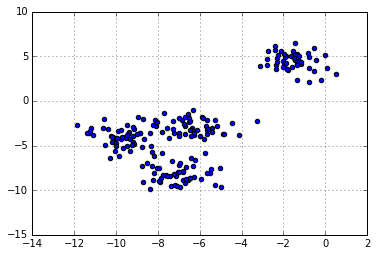

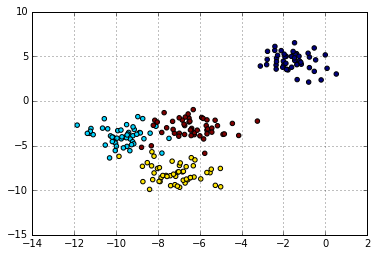

In [74]:
#データの可視化
plt.figure()
plt.scatter(*X1.T)
plt.grid()
plt.figure()
plt.scatter(*X1.T, marker='o', c=Y1)
plt.grid()
plt.show()

In [2]:
# 正解ラベル
print(Y1)

[3 0 2 2 3 0 0 0 2 1 0 1 2 2 3 2 3 2 3 2 3 3 2 0 1 0 0 2 2 1 1 2 2 2 1 3 2
 3 2 3 1 1 0 0 2 2 0 2 1 0 3 2 3 0 2 2 1 1 3 0 0 2 1 1 3 3 1 3 2 3 3 0 1 2
 0 1 1 2 2 2 3 0 2 2 1 3 1 0 2 2 1 3 0 1 1 0 1 3 1 3 1 1 3 0 3 3 2 1 2 0 1
 3 0 0 1 0 0 3 0 1 1 2 1 3 3 0 1 3 3 3 0 1 2 0 0 2 2 2 0 0 3 1 3 0 2 2 3 3
 0 3 2 0 0 1 0 1 3 0 1 0 3 1 1 0 2 3 1 3 2 0 1 3 2 1 0 3 0 0 1 1 3 1 0 0 2
 1 3 0 1 1 3 3 3 2 0 2 2 1 3 2]


In [69]:
# モデルの宣言
kmeans = sklearn.cluster.KMeans(n_clusters=2) #WRITE ME　

In [70]:
# フィッティング
Ypred = kmeans.fit_predict(X1) # WRITE ME
print(Ypred)

[0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0
 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 1 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0]


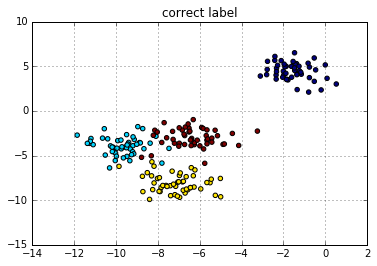

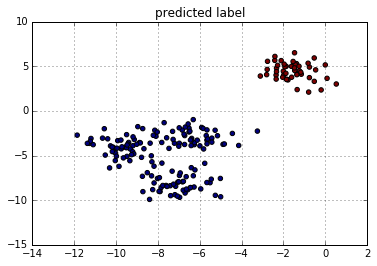

In [71]:
# 結果の可視化
plt.figure()
plt.scatter(*X1.T, marker='o', c=Y1)
plt.title("correct label")
plt.grid()
plt.figure()
plt.scatter(*X1.T, marker='o', c=Ypred)
plt.title("predicted label")
plt.grid()
plt.show()

# PCA
scikitlearnでは手書き文字のデータセットが用意されています。<br>
http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

ここでは、PCAを使って手書き文字のデータの次元圧縮をしてみましょう。

- 公式リファレンス:<br>
http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [1]:
import sklearn.decomposition
import sklearn.datasets
import matplotlib.pyplot as plt

data = sklearn.datasets.load_digits(n_class=5) # sklearnに付属の手書き文字データ

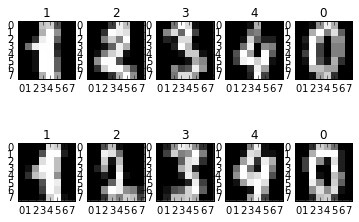

In [41]:
# データを可視化
plt.figure()
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(data.images[i], cmap="gray", interpolation="none")
    plt.title(data.target[i])
plt.show()

In [ ]:
# モデルの宣言
# 今回は可視化してみたいので2次元に圧縮してみましょう
pca = sklearn.decomposition.PCA(n_components=2) #WRITE ME

# 2次元空間に写像する
pca_point = pca.fit_transform(data.data) #WRITE ME

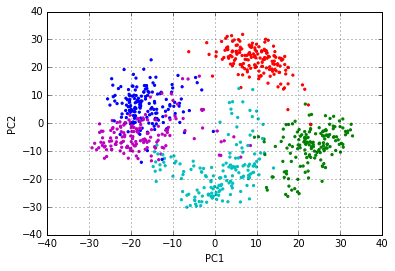

In [75]:
# 結果の可視化
color = ["r","c","m","b","g"]
plt.scatter(*pca_point.T, marker=".", color=map(lambda x:color[x], data.target))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid()
plt.show()

# SVM
SVMを実際にやってみます。
せっかくなので、先ほど次元圧縮した手書き文字データを使ってクラス分けしてみましょう。

- 公式リファレンス:<br>
http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [59]:
import sklearn.decomposition
import sklearn.datasets
import sklearn.svm
import matplotlib.pyplot as plt

data = sklearn.datasets.load_digits(n_class=5)
train_data = data.data[:800]
train_label = data.target[:800]
test_data = data.data[800:]
test_label = data.target[800:]

pca = sklearn.decomposition.PCA(n_components=2)
pca_point = pca.fit_transform(train_data)

In [60]:
# モデルの選択
svm = sklearn.svm.SVC() #WRITE ME!

# フィッティング
svm.fit(pca_point, train_label) #WRITE ME!

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [61]:
#テストデータの次元圧縮
transformed_test_data = pca.transform(test_data)

# テストデータの予測
predict = svm.predict(transformed_test_data) #WRITE ME
print(predict)

[0 1 2 2 2 1 2 4 1 1 4 2 0 1 2 2 1 1 3 1 2 1 4 2 1 4 1 3 1 4 4 2 3 1 4 0 0
 1 2 2 4 0 1 2 2 4 0 1 2 1 4 0 0 4 1 1 1 0 0 2 2 2 0 1 2 1 2 2 1 4 4 1 0 2
 2 0 0 1 2 3 1 4 3 1 2 1 4 2 1 4 1 3 1 4 4 2 2 2 4 4 0]


In [62]:
# 正解率の計算
correct = 0.0
for i in range(len(predict)):
    if predict[i] == test_label[i]:
        correct += 1
print(correct/len(predict))

0.742574257426


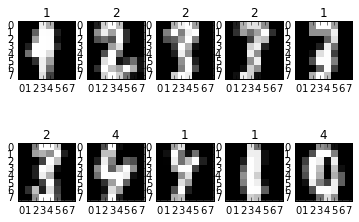

In [63]:
test_image = data.images[800:]
plt.figure()
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(test_image[i], cmap="gray", interpolation="none")
    plt.title(predict[i])
plt.show()

### 補足
次元圧縮の重要性を確かめるために、元のデータ(64次元)のままクラスタリングして正解率を見てみましょう

In [73]:
svm.fit(train_data, train_label)
predict = svm.predict(test_data)

correct = 0.0
for i in range(len(predict)):
    if predict[i] == test_label[i]:
        correct += 1
print(correct/len(predict))

0.594059405941
